# Homework One: Orthographic Representation
Name: Vasukesh Yarlagadda<br>
Date: 2/11/2018<br>
Class: Digital Image & Pattern

In [7]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Set Constant Image Path
original_image_path = "/Users/vyarlaga/Desktop/Digital-Image-Classwork/Images/Pele.png"
original_image_path2 = "/Users/vyarlaga/Desktop/Digital-Image-Classwork/Images/disk_cassette.png"

In [9]:

# Create Constant For Marker Thickness (Points)
Thickness = 8
# Read Original Images
img = cv2.imread(original_image_path)
img2 = cv2.imread(original_image_path2)

# Create Hash Table For Circle Coordinates for mapping
lookupTable = {0:(208,66), 1:(473,5), 2:(197,181), 3:(481,299)}
affineTable = {0:(50,50), 1:(200,50), 2:(50,200)}

# capture shape of images
rows,cols,ch = img.shape
rows1,cols1,ch1 = img2.shape

In [10]:
# ==================== Perspective Projection ============== #
# Grab Perspective Points ([Top Right], [Top Left], [Bottom Right], [Bottom Left] )
pts1 = np.float32([[208,66], [473,5], [197,181], [481,299]])
# Fixed Control Points
pts2 = np.float32([[0,0], [300,0], [0, 300], [300, 300]])
# Get Perspective From Points
M = cv2.getPerspectiveTransform(pts1,pts2)
# wrap perspective to new dimension
dst = cv2.warpPerspective(img,M,(300,300))

In [11]:
#========================= Affine Transformation ===============#
pts11 = np.float32([[50,50],[200,50],[50,200]])
pts22 = np.float32([[10,100],[200,50],[100,250]])

M2 = cv2.getAffineTransform(pts11,pts22)
dst2 = cv2.warpAffine(img2,M2,(cols1,rows1))

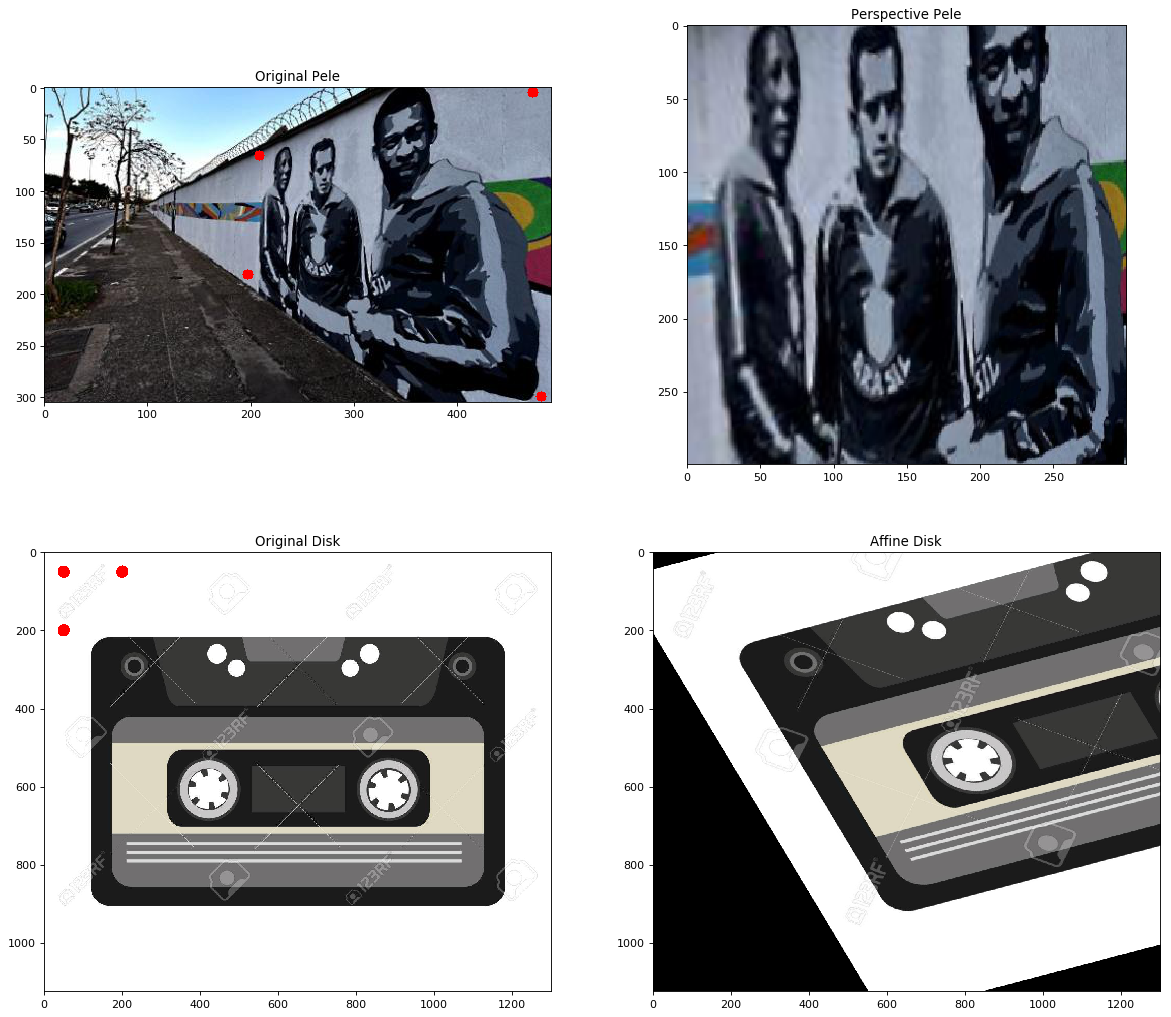

In [12]:
#========================== Ploting All Section ==============================#
# setting consitant figure size
plt.figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

#indicate Points Used on Original Image
for i in range(0,len(lookupTable)):
  img = cv2.circle(img,lookupTable[i], Thickness-3, (0,0,255), -1)

for j in range(0, len(affineTable)):
  img2 = cv2.circle(img2,affineTable[j],Thickness+8,(0,0,255),-1)

plt.subplot(221),plt.imshow(img),plt.title('Original Pele')
# Fix Coloring On Image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(222),plt.imshow(dst),plt.title('Perspective Pele')
# Fix Coloring On Image
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

plt.subplot(223),plt.imshow(img2),plt.title('Original Disk')
# Fix Coloring On Image
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.subplot(224),plt.imshow(dst2),plt.title('Affine Disk')
# Fix Coloring On Image
plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))

# Show Full Figure
plt.show()